In [ ]:
!pip install fastdtw

In [ ]:
!pip install dtw

DTW distance between direct and retail sales: 7101598.989881428


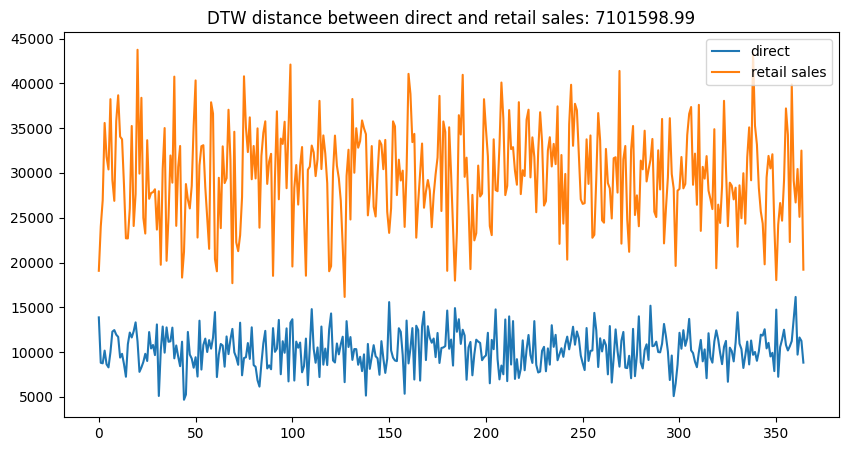

DTW distance between direct and unknown sales: 530321.6343131997


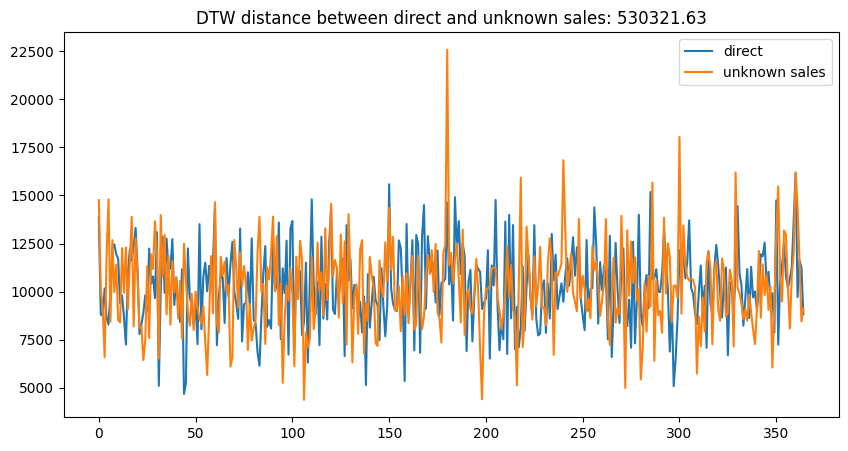

DTW distance between retail sales and unknown sales: 7086600.929722157


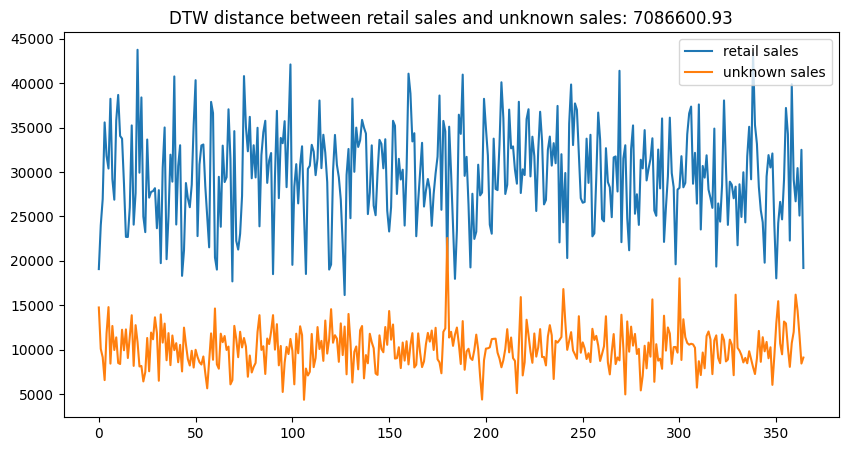

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fastdtw import fastdtw

# Load the credit card data set
df = pd.read_csv('credit_card_data.csv', parse_dates=['datetime'])

# Set the columns to apply DTW to
columns = ['direct', 'retail sales', 'unknown sales']

# Compute the DTW distance for each combination of columns
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]
        
        # Compute the DTW distance between the two columns
        dist, _ = fastdtw(df[col1], df[col2])
        print(f"DTW distance between {col1} and {col2}: {dist}")
        
        # Plot the DTW distance between the two columns
        _, ax = plt.subplots(figsize=(10, 5))
        ax.plot(df[col1], label=col1)
        ax.plot(df[col2], label=col2)
        ax.set(title=f"DTW distance between {col1} and {col2}: {dist:.2f}")
        ax.legend()
        plt.show()


In [ ]:

#output  
'''
1. pairwise DTW distances between the metrics direct, retail sales, and unknown sales
    DIstance represents how different the time series for each pair of metrics are from each other, 
    based on the DTW algorithm
2. the distance between direct and retail sales is 7101598.989, 
    which means that the time series for these metrics are not similar to each other. 
    In contrast, the distance between direct and unknown sales is 530321.63, indicating that these time series are more 
    similar comparitively
3.  graph - DTW path for each pair of metrics
    
    The x-axis on the graphs represents time, in the same units as the original datetime column of the dataset
    (e.g., days, hours, etc.). The y-axis represents the values of the corresponding metric (e.g., sales, applications, etc.).'''

# x-axis represents date, y- axis - the metric

In [ ]:
#applying for scaled data set

DTW distance between direct and retail sales: 47.65466036836924


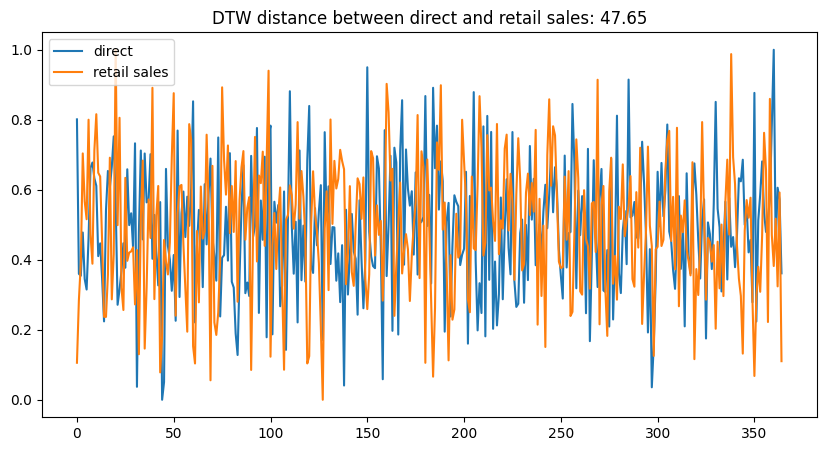

DTW distance between direct and unknown sales: 64.96919473065304


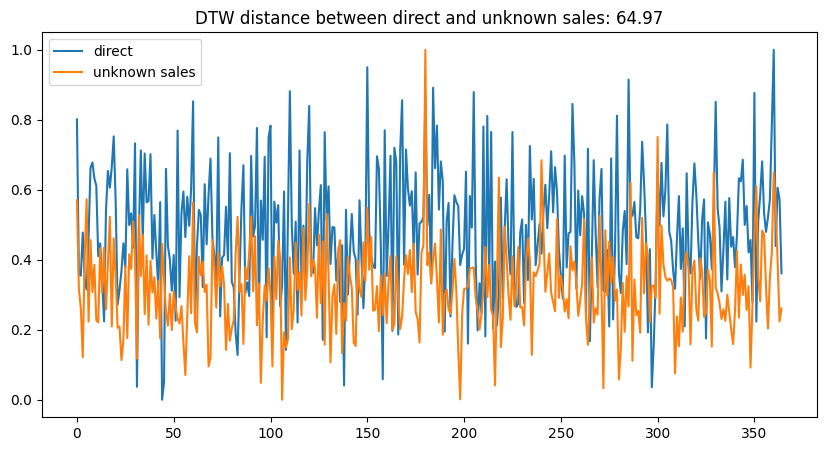

DTW distance between retail sales and unknown sales: 74.25750912930705


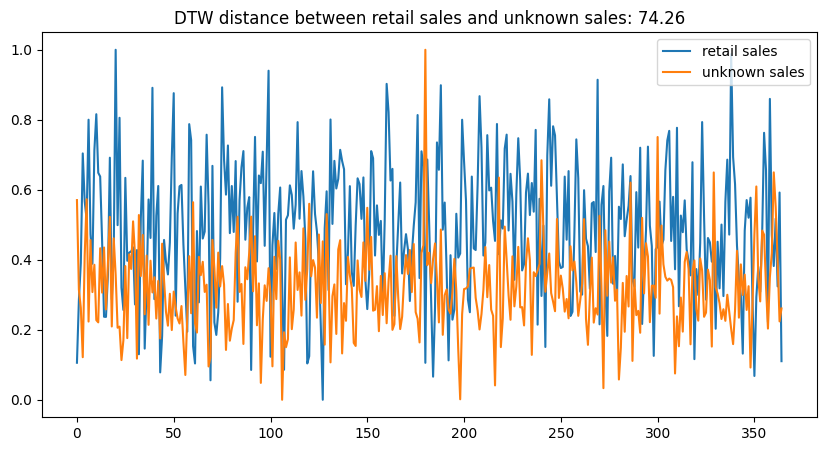

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fastdtw import fastdtw

# Load the credit card data set
df = pd.read_csv('scaled_credit_card_data.csv', parse_dates=['datetime'])

# Set the columns to apply DTW to
columns = ['direct', 'retail sales', 'unknown sales']

# Compute the DTW distance for each combination of columns
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]
        
        # Compute the DTW distance between the two columns
        dist, _ = fastdtw(df[col1], df[col2])
        print(f"DTW distance between {col1} and {col2}: {dist}")
        
        # Plot the DTW distance between the two columns
        _, ax = plt.subplots(figsize=(10, 5))
        ax.plot(df[col1], label=col1)
        ax.plot(df[col2], label=col2)
        ax.set(title=f"DTW distance between {col1} and {col2}: {dist:.2f}")
        ax.legend()
        plt.show()


In [ ]:
# output vaired for the 2. scaling produces incorrect results
#mean and standard deviation, which are sensitive to outliers. Toutliers can have a significant impact on the scaling process and lead to distorted scaling results.

In [ ]:
#PCA, yet to complete

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# read the csv file into a pandas dataframe
data = pd.read_csv('credit_card_data.csv')

# extract the features from the dataframe
features = data[['Sales', 'direct', 'retail sales', 'unknown sales', 'applications', 'net applications']].values

# standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# create a PCA object with 2 principal components
pca = PCA(n_components=2)

# fit the PCA model to the data
pca.fit(features_scaled)

# transform the data into the principal components
features_pca = pca.transform(features_scaled)

# create a new dataframe with the principal components
pca_df = pd.DataFrame(data = features_pca, columns = ['PC1', 'PC2'])

# concatenate the datetime column from the original dataframe to the pca dataframe
pca_df['datetime'] = data['datetime']

# print the variance explained by each principal component
print(pca.explained_variance_ratio_)


[0.32356815 0.16075578]
